In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../initial_data/labels.csv")

In [3]:
df.drop("folder_size", axis = 1).head()

,id,model,type,brand,Style,year,Color
0,2402544,Toyota Camry,Camry,Toyota,Sedan,2004,Black
1,2460326,Toyota Camry,Camry,Toyota,Sedan,2012,White
2,2328424,Toyota Camry,Camry,Toyota,Sedan,2013,Gray
3,2358214,Toyota Camry,Camry,Toyota,Sedan,2008,White
4,2453232,Toyota Camry,Camry,Toyota,Sedan,2010,Silver


In [4]:
df.head()

,id,model,type,brand,Style,year,Color,folder_size
0,2402544,Toyota Camry,Camry,Toyota,Sedan,2004,Black,450.750977
1,2460326,Toyota Camry,Camry,Toyota,Sedan,2012,White,820.288086
2,2328424,Toyota Camry,Camry,Toyota,Sedan,2013,Gray,1090.664062
3,2358214,Toyota Camry,Camry,Toyota,Sedan,2008,White,942.509766
4,2453232,Toyota Camry,Camry,Toyota,Sedan,2010,Silver,824.727539


<AxesSubplot:xlabel='count', ylabel='brand'>

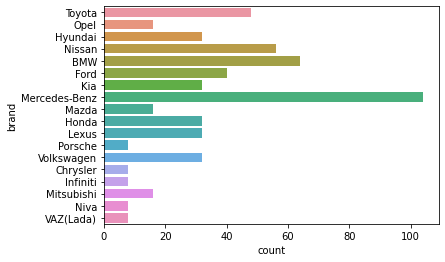

In [10]:
sns.countplot(y="brand", data=df)

<AxesSubplot:xlabel='count', ylabel='Style'>

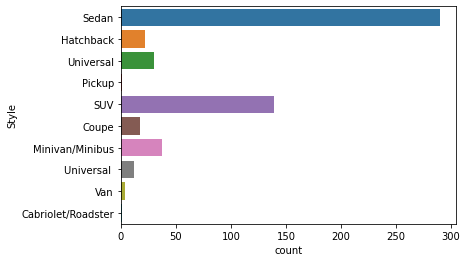

In [11]:
sns.countplot(y="Style", data=df)